# Loading datasets using *CheLo*

In this notebook, we will explore two datasets using Python. The goal is to learn how to load datasets, inspect their structure, split them into training and testing sets, and visualize their features and distributions.


First, we need to import some libraries:

In [1]:
import pandas as pd
import numpy as np
from chelo import DatasetRegistry

We start by loading the Wine Quality Dataset, which contains features like acidity, residual sugar, and alcohol content, and the target variable *Quality*.

In [2]:
wine_dataset = DatasetRegistry.get_dataset("WineQualityDataset", wine_type="white")
wine_dataset.load_data()

File downloaded and saved at 'C:\Users\nick\.chelo\wine_quality\winequality-white.csv'.


In [3]:
# Display available features and targets
print("Available features: ", wine_dataset.list_features())
print("Available targets: ", wine_dataset.list_targets())

Available features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Available targets:  ['quality']


Using *CheLo* we can get the dataset in various formats, including numpy.

In [7]:
X_wine, y_wine = wine_dataset.to_numpy()

We will examine the shape of the feature matrix and the target array to understand their structure:

In [9]:
print(f"Features shape: {X_wine.shape}")
print(f"Target shape: {y_wine.shape}")

Features shape: (4898, 11)
Target shape: (4898, 1)


In [11]:
print(X_wine[0, :])

[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
 1.001e+00 3.000e+00 4.500e-01 8.800e+00]


In [14]:
print(y_wine[0])

[6]


In [16]:
print(y_wine[:15])

[[6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [7]
 [5]]


We can split the dataset into training and testing sets to prepare for model development in future steps.

In [17]:
from sklearn.model_selection import train_test_split

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)


print(f"Training set shape: {X_wine_train.shape}, {y_wine_train.shape}")
print(f"Testing set shape: {X_wine_test.shape}, {y_wine_test.shape}")

Training set shape: (3918, 11), (3918, 1)
Testing set shape: (980, 11), (980, 1)


### Visualizing datasets

Let's visualize the distribution of the target variable "Quality" to understand its range and frequency.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

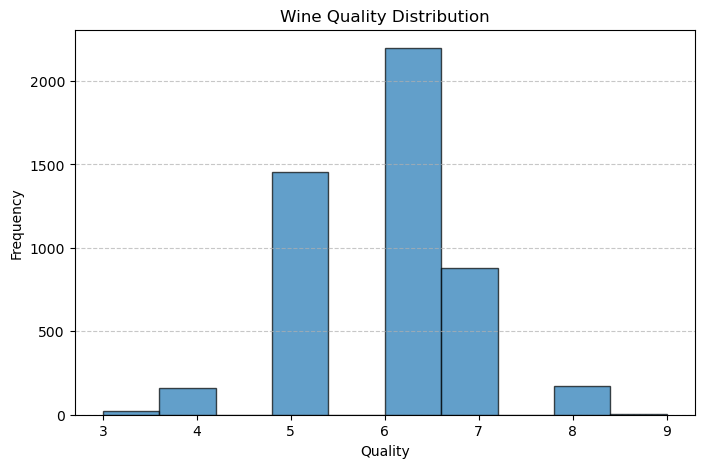

In [21]:
# Plot the target variable distribution
plt.figure(figsize=(8, 5))
plt.hist(y_wine,  edgecolor="k", alpha=0.7)
plt.title("Wine Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7),
plt.show()

We can also examine various input features:

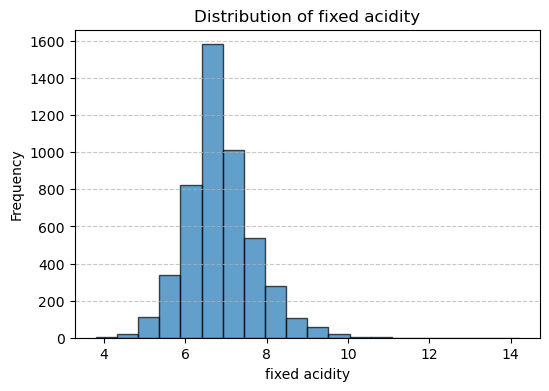

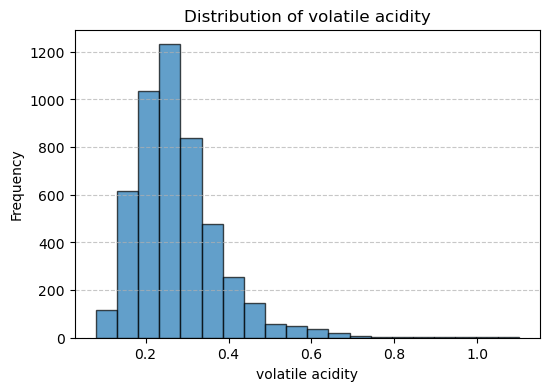

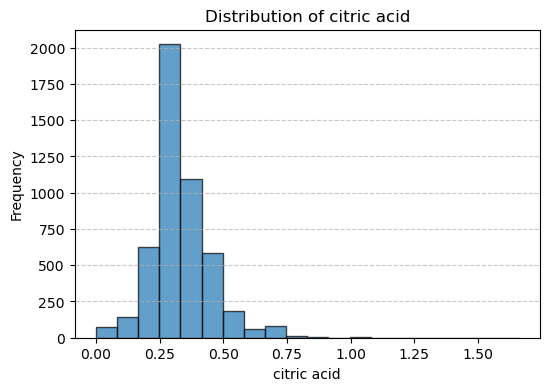

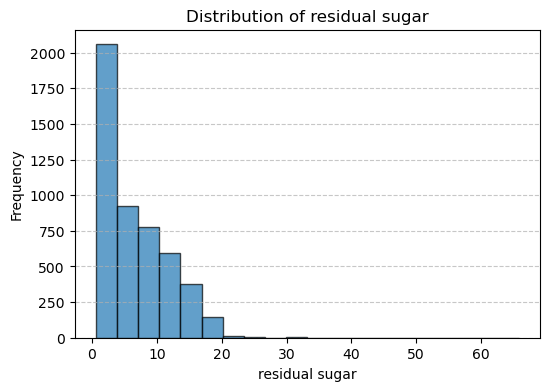

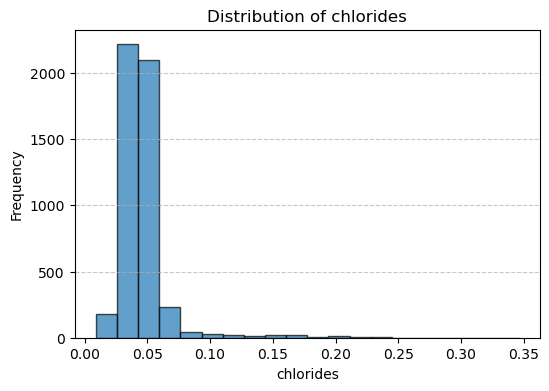

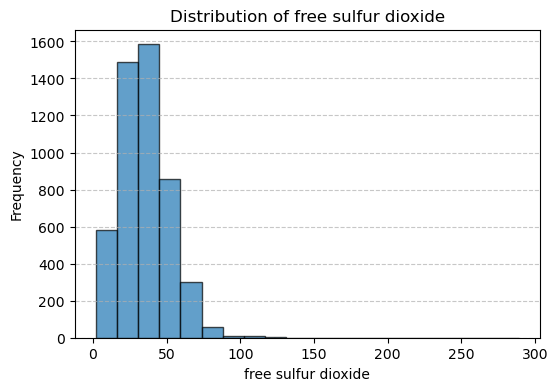

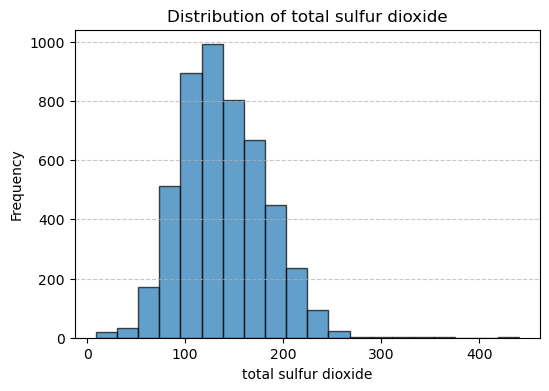

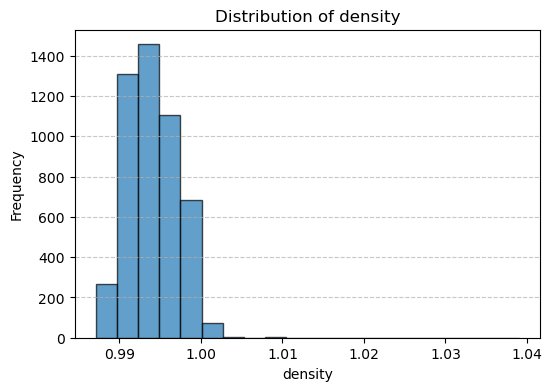

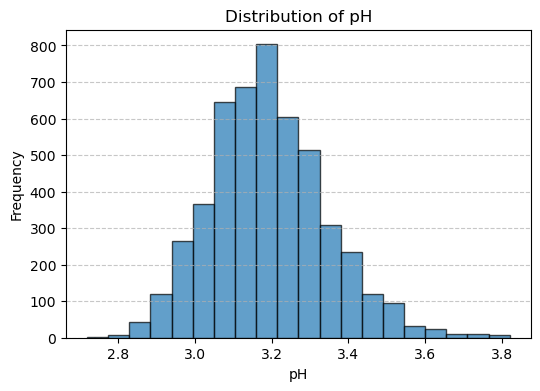

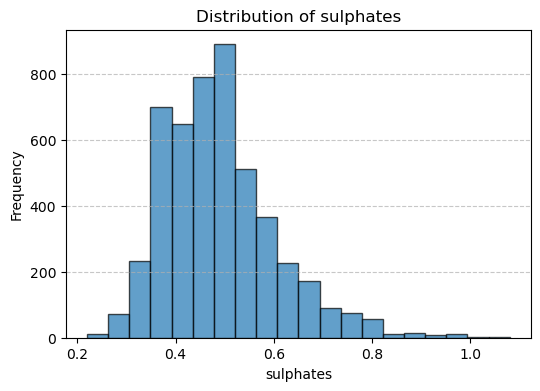

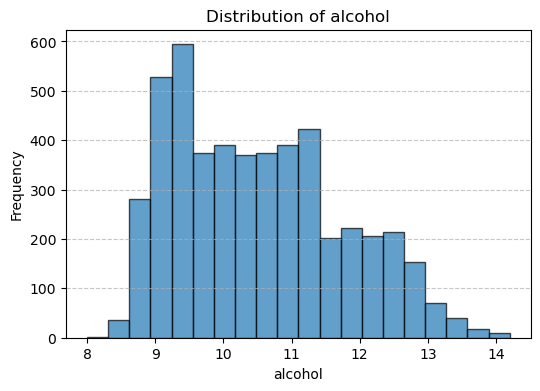

In [24]:
# Visualize the distribution of specific features
features_names = wine_dataset.list_features()
for i in range(len(features_names)):
    plt.figure(figsize=(6, 4))
    plt.hist(X_wine[:, i], bins=20, edgecolor="k", alpha=0.7)
    plt.title(f"Distribution of {features_names[i]}")
    plt.xlabel(features_names[i])
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


We can also plot the correlation matrix:

We can also use plotly for more advanced plots:

In [22]:
import plotly.express as px
# Create a scatter matrix
wine_df = pd.DataFrame(X_wine, columns=wine_dataset.list_features())
wine_df["Quality"] = y_wine

fig = px.scatter_matrix(
    wine_df,
    dimensions=wine_dataset.list_features(),
    color="Quality",
    title="Feature Relationships in Wine Quality Dataset",
    height=800
)
fig.show()

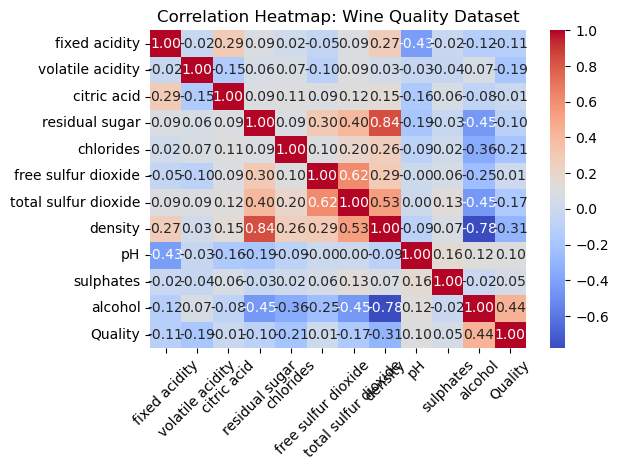

In [25]:
import seaborn as sns
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Wine Quality Dataset")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

We can have also pair plots:

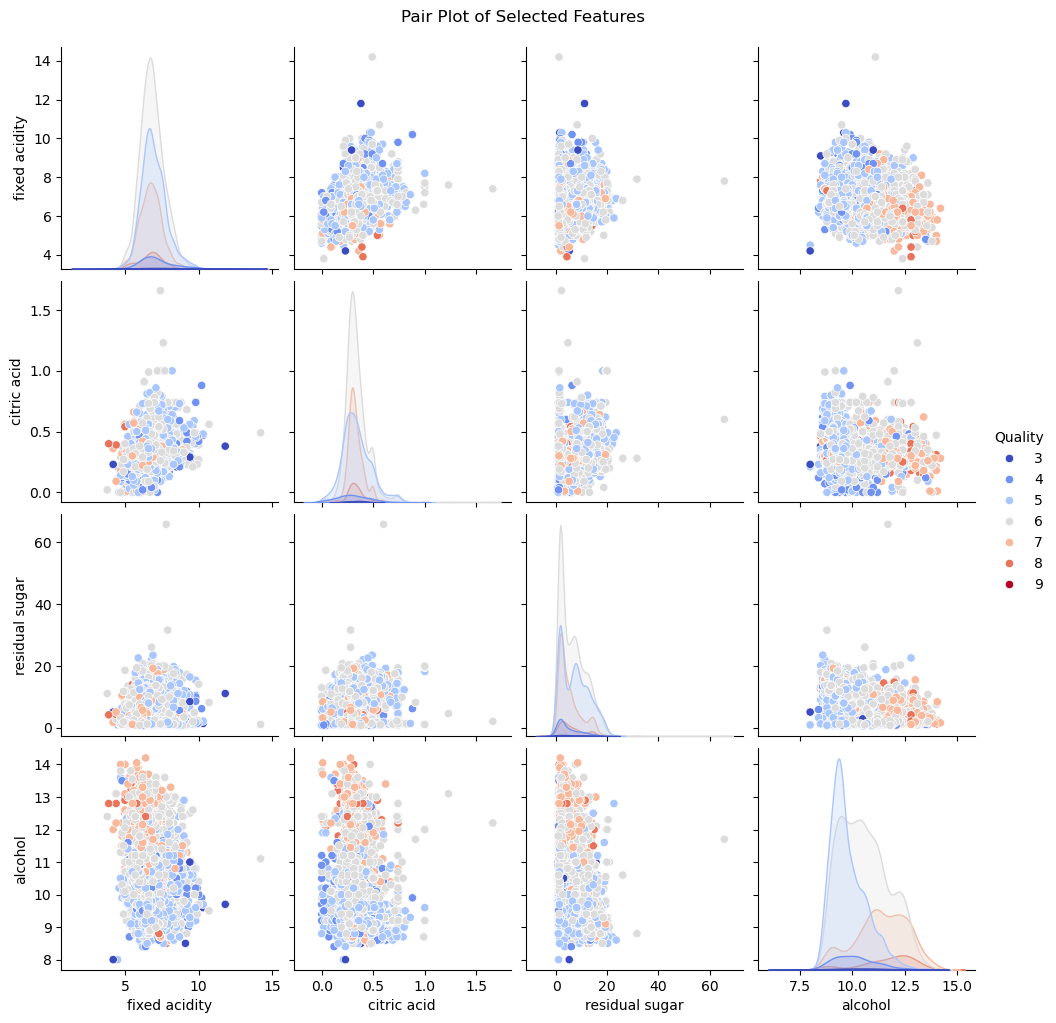

In [27]:
selected_features = ["fixed acidity", "citric acid", "residual sugar", "alcohol", "Quality"]
sns.pairplot(wine_df[selected_features], hue="Quality", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

## What about another dataset?

Actually we can do exactly the same for any dataset!

In [37]:
# Load the Coal Fired Plant Dataset
mutagenicity_dataset = DatasetRegistry.get_dataset("AmesMutagenicityDataset")
mutagenicity_dataset.load_data()

# Display available features and targets
print("Available features: ", mutagenicity_dataset.list_features())
print("Available targets: ", mutagenicity_dataset.list_targets())

# Convert to numpy arrays
X_mutagenicity, y_mutagenicity = mutagenicity_dataset.to_numpy()

Available features:  ['NumValenceElectrons', 'qed', 'TPSA', 'MolMR', 'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP']
Available targets:  ['mutagenicity']


Let's examine the dataset shape:

In [38]:
print(f"Features shape: {X_mutagenicity.shape}")
print(f"Target shape: {y_mutagenicity.shape}")

Features shape: (5764, 8)
Target shape: (5764, 1)


We can also have histograms as before:

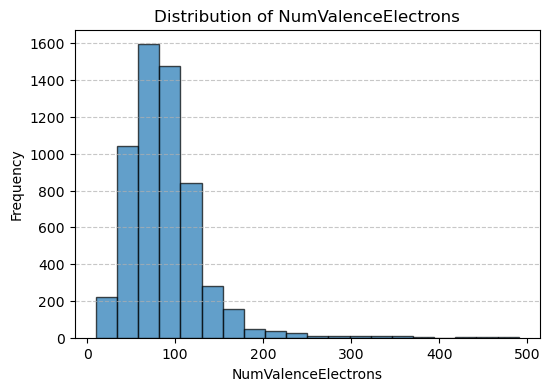

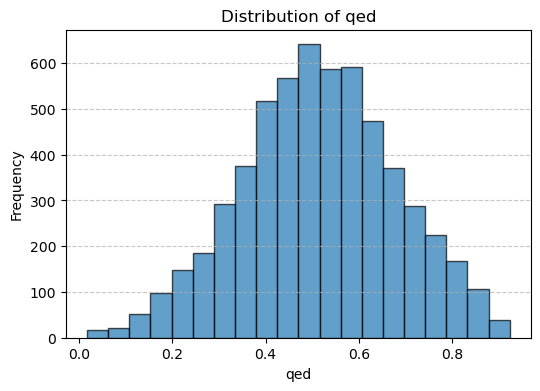

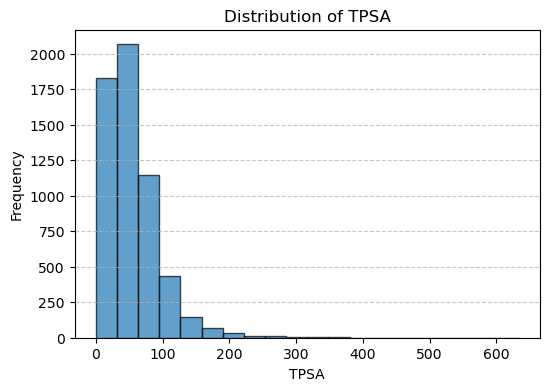

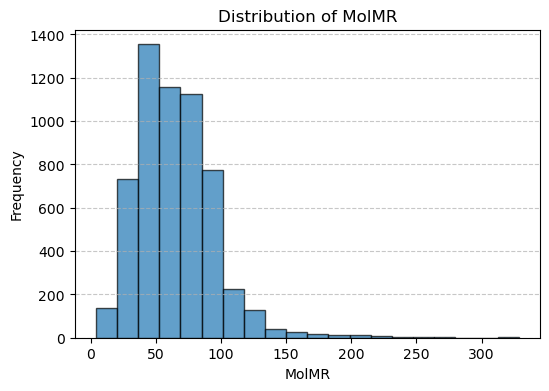

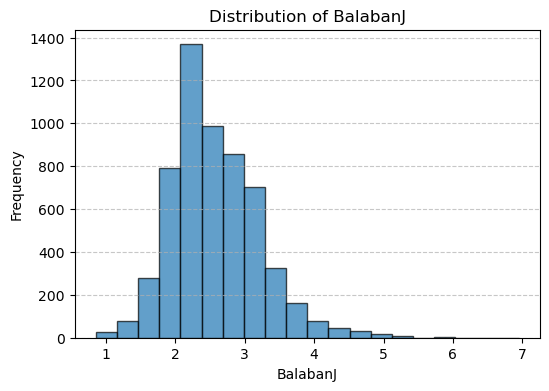

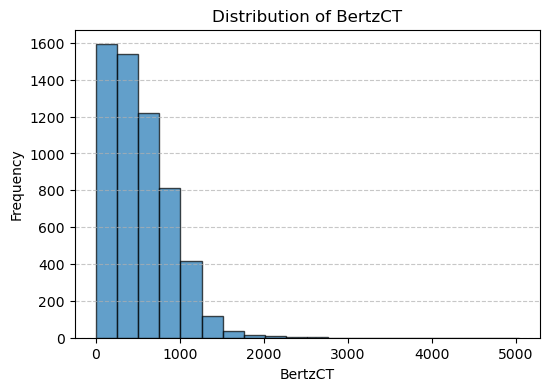

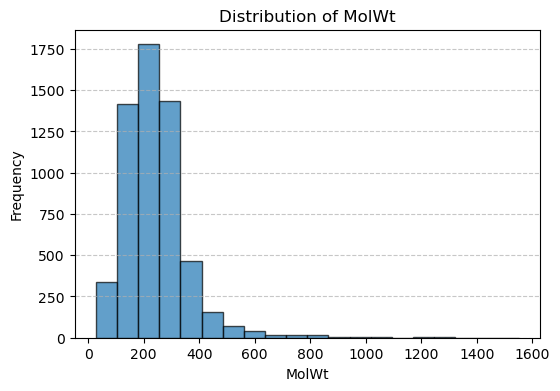

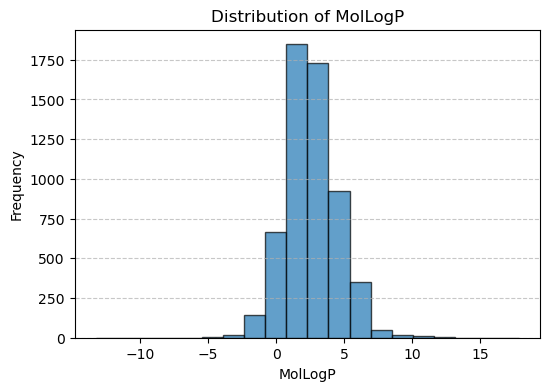

In [39]:
features_names = mutagenicity_dataset.list_features()
for i in range(len(features_names)):
    plt.figure(figsize=(6, 4))
    plt.hist(X_mutagenicity[:, i], bins=20, edgecolor="k", alpha=0.7)
    plt.title(f"Distribution of {features_names[i]}")
    plt.xlabel(features_names[i])
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

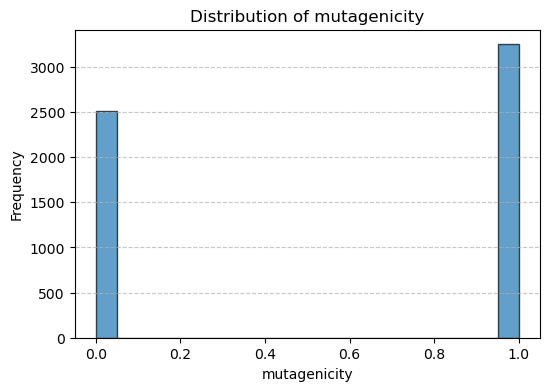

In [40]:
plt.figure(figsize=(6, 4))
plt.hist(y_mutagenicity, bins=20, edgecolor="k", alpha=0.7)
plt.title(f"Distribution of mutagenicity")
plt.xlabel("mutagenicity")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Let's now create a scatter matrix:


In [42]:
mutagenicity_df = pd.DataFrame(X_mutagenicity, columns=mutagenicity_dataset.list_features())
mutagenicity_df["Mutagenicity"] = y_mutagenicity

fig = px.scatter_matrix(
    mutagenicity_df,
    dimensions=mutagenicity_dataset.list_features(),
    color="Mutagenicity",
    height=800
)
fig.show()

Let's also examine the correlation matrix:

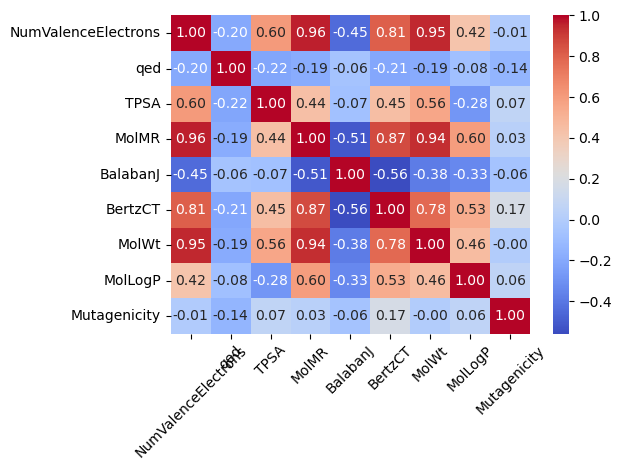

In [44]:
correlation_matrix = mutagenicity_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Time-series datasets

What about loading and visualizing timeseries datasets?
Let's load time-series data of concentrations of three species (A, B, and X) in a continuous stirred-tank reactor (CSTR). 

In [47]:
# Load the Coal Fired Plant Dataset
cstr_dataset = DatasetRegistry.get_dataset("CSTRDataset")
cstr_dataset.load_data()

# Display available features and targets
print("Available features: ", cstr_dataset.list_features())
print("Available targets: ", cstr_dataset.list_targets())

# Convert to numpy arrays
X_cstr, y_cstr = cstr_dataset.to_numpy()
print(f"Features shape: {X_cstr.shape}")
print(f"Target shape: {y_cstr.shape}")

Available features:  ['c_A', 'c_B', 'c_X']
Available targets:  ['c_A', 'c_B', 'c_X']
Features shape: (29, 1, 3)
Target shape: (29, 3)


Let's plot the concentrations through time:

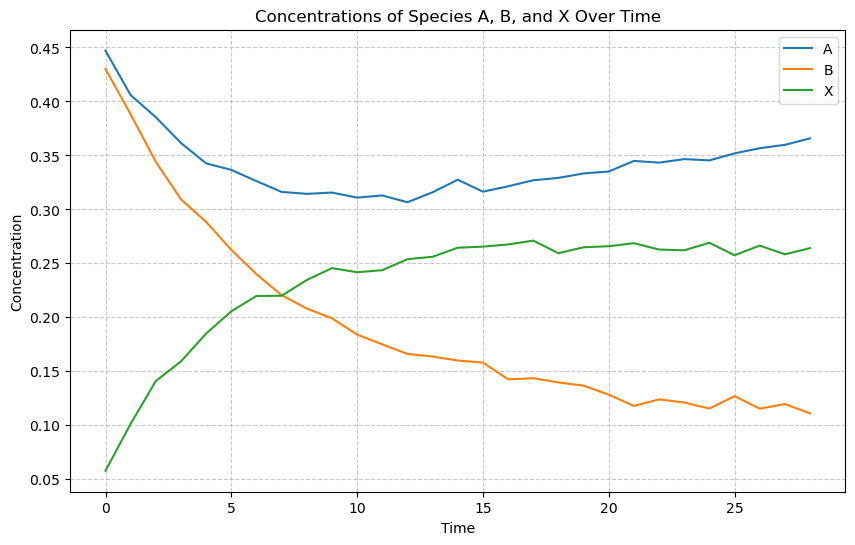

In [48]:
species = ["A", "B", "X"] 

plt.figure(figsize=(10, 6))
for i in range(len(species)):
    plt.plot(y_cstr[:, i], label=species[i])

plt.title("Concentrations of Species A, B, and X Over Time")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()